In [268]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial
import numpy as np
from mpl_toolkits import mplot3d
import math
%matplotlib inline

In [269]:
#Rosenbrock function with a=1,b=100
def Rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

In [270]:
def Grad_Rosenbrock(x,y):
    g1 = -400*x*y + 400*x**3 + 2*x -2
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

## SGD

In [273]:
def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=1e-4, nMax = 10000 ):
    #Initialization
    i = 0
    iter_x_1, iter_y_1, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x_1 = np.append(iter_x_1,x)
        iter_y_1 = np.append(iter_y_1,y)
        iter_count = np.append(iter_count ,i)   
        
 
        X_prev = X
        X = X - gamma * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x_1,iter_y_1, iter_count


root_1,iter_x_1,iter_y_1, iter_count = Gradient_Descent(Grad_Rosenbrock,-1,-1)

[0.91653862 0.83969197]


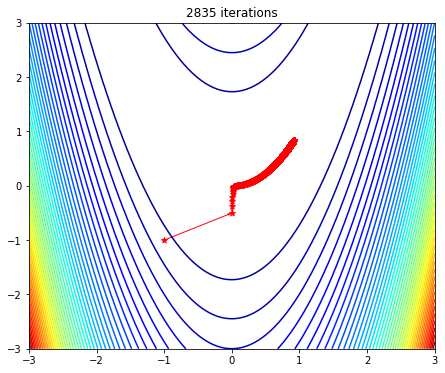

In [332]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)
fig = plt.figure(figsize = (16,6))

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r')
ax.set_title('{} iterations'.format(len(iter_count)))

plt.show()

## SGD+Momentum

In [319]:
def Gradient_Descent_momentum(Grad,x,y, alpha = 1e-4, beta = 0.9, epsilon = 1e-4, nMax = 10000 ):
#momentum=0.9
    i = 0
    iter_x_2, iter_y_2, iter_count_2 = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    v = 0
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x_2 = np.append(iter_x_2,x)
        iter_y_2 = np.append(iter_y_2,y)
        iter_count_2 = np.append(iter_count_2 ,i)   
        
        X_prev = X
        v_prev = v
        v = beta * v + alpha * Grad(x,y)
        X = X - v 
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x_2,iter_y_2, iter_count_2

root_2,iter_x_2,iter_y_2, iter_count_2 = Gradient_Descent_momentum(Grad_Rosenbrock,-1,-1)

[1.05827226 1.12594734]


## Newton's Method

In [320]:
def Hessian_Rosenbrock(x,y):
    h11 = -400*y + 1200*x**2 + 2
    h12 = -400 * x
    h21 = -400 * x
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])

In [321]:
def Newton_Method(Grad, Hess, x,y, epsilon=1e-6, nMax = 200):
    #Initialization
    i = 0
    iter_x_3, iter_y_3, iter_count_3 = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x_3 = np.append(iter_x_3,x)
        iter_y_3 = np.append(iter_y_3,y)
        iter_count_3 = np.append(iter_count_3 ,i)   
        print(X) 
        
        X_prev = X
        X = X - np.linalg.inv(Hess(x,y)) @ Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    return X, iter_x_3,iter_y_3, iter_count_3

root_3,iter_x_3,iter_y_3, iter_count_3 = Newton_Method(Grad_Rosenbrock,Hessian_Rosenbrock,-1,-1)

[-1 -1]
[-0.99501247  0.99002494]
[ 0.99012376 -2.96042079]
[0.99013628 0.98036985]
[1.         0.99990271]
[1. 1.]


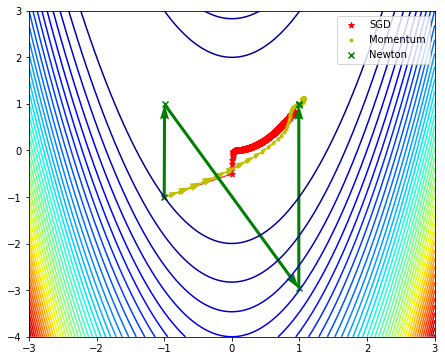

In [336]:
x = np.linspace(-3,3,100)
y = np.linspace(-4,3,100)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)
fig = plt.figure(figsize = (16,6))

anglesx_1 = iter_x_1[1:] - iter_x_1[:-1]
anglesy_1 = iter_y_1[1:] - iter_y_1[:-1]
anglesx_2 = iter_x_2[1:] - iter_x_2[:-1]
anglesy_2 = iter_y_2[1:] - iter_y_2[:-1]
anglesx_3 = iter_x_3[1:] - iter_x_3[:-1]
anglesy_3 = iter_y_3[1:] - iter_y_3[:-1]

#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x_1,iter_y_1,color = 'r', marker = '*', label = 'SGD')
ax.quiver(iter_x_1[:-1], iter_y_1[:-1], anglesx_1, anglesy_1, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r')

ax.scatter(iter_x_2,iter_y_2,color = 'y', marker = '.',label = 'Momentum')
ax.quiver(iter_x_2[:-1], iter_y_2[:-1], anglesx_2, anglesy_2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'y')

ax.scatter(iter_x_3,iter_y_3,color = 'g', marker = 'x',label = 'Newton')
ax.quiver(iter_x_3[:-1], iter_y_3[:-1], anglesx_3, anglesy_3, scale_units = 'xy', angles = 'xy', scale = 1, color = 'g')

ax.legend()
plt.show()

In [338]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [339]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial